1.
Introduction to the Problem:
The Fashion-MNIST dataset is widely used for benchmarking machine learning models in computer vision tasks. It contains 28x28 grayscale images of 10 different types of clothing items, such as T-shirts, trousers, and shoes. The goal is to develop models that can accurately classify these images into their respective categories. This problem has practical implications in areas like automated inventory management, fashion recommendation systems, and online retail.

Key Questions to Investigate from the Fashion-MNIST Dataset:
Classification Accuracy: How accurately can a machine learning model classify clothing items based on their pixel values?
Feature Importance: Which pixel regions contribute the most to the classification of a particular clothing item?
Model Comparison: Which machine learning model (e.g., Convolutional Neural Networks, Random Forests) performs best on the Fashion-MNIST dataset?
Generalization to Unseen Data: How well do the models generalize when predicting new, unseen images from the test set?
Impact of Image Resolution: How does image resolution (e.g., downscaling to smaller sizes) affect the model's performance?
Class Imbalance: Does the distribution of images across the 10 classes affect the model’s performance?
Misclassification Analysis: Which clothing items are most frequently misclassified, and why?


2.
Description of the Fashion-MNIST Dataset
The Fashion-MNIST dataset is a collection of 70,000 grayscale images, each representing a clothing item. These images are divided into two sets: a training set with 60,000 examples and a test set with 10,000 examples. The dataset is structured in a way that is ideal for image classification task.

Rows:
Meaning: Each row in the dataset corresponds to a single image of a clothing item. In total, there are 70,000 rows, each representing an individual clothing item.
Structure:
The first column in each row contains the class label (a number from 0 to 9), which indicates the type of clothing item (e.g., T-shirt, Trouser, Sneaker, etc.).
The remaining 784 columns contain the pixel values of the image. These pixel values range from 0 to 255, where 0 represents a white pixel (completely light), and 255 represents a black pixel (completely dark).

Columns:
Meaning: The dataset has 785 columns in total.
Column 1: This is the class label, representing the category of the clothing item. There are 10 possible class labels:
0: T-shirt/top,1: Trouser,2: Pullover,3: Dress,4: Coat,5: Sandal,6: Shirt,7: Sneaker,8: Bag,9: Ankle boot
Columns 2-785: These columns represent the pixel values of the 28x28 image (28 x 28 = 784 pixels). The pixels are flattened into a single row, where each value indicates the intensity (darkness) of the pixel.

Special Characteristics for Modeling
Pixel Intensity Range: The pixel values range from 0 to 255, where higher values indicate darker pixels.
Class Imbalance: The dataset is relatively balanced across the 10 classes, meaning no single class dominates the dataset.
Spatial Relationships: The pixel values are arranged in a flattened format.
Noisy Data: Some images may be difficult to classify due to their similarity with other classes or poor resolution.
Scale-Invariance: The dataset contains different clothing items that may vary in size and position within the image.


3.
Logistic Regression is a widely used machine learning model for binary and multi-class classification problems,Logistic Regression is a good fit for the Fashion-MNIST dataset:

Suitability for Classification TasksPurpose: Logistic Regression is inherently designed for classification tasks. In the case of Fashion-MNIST, the goal is to classify images of clothing items into one of 10 categories (e.g., T-shirt, Trouser, Sneaker, etc.).

Interpretability
Simple and Interpretable Model: Logistic Regression is easy to interpret. The model’s coefficients can be analyzed to understand how each feature (i.e., pixel value) contributes to the probability of the image belonging to a certain class.
Efficiency with High-Dimensional Data:
Handles Large Feature Sets: Fashion-MNIST images have 784 features (pixels). Logistic Regression can handle this high-dimensional data efficiently, especially when regularization is applied to prevent overfitting.
Feature Selection: Although Logistic Regression uses all features, the model can be combined with techniques like L1 regularization (Lasso) to perform feature selection, effectively reducing dimensionality by shrinking irrelevant coefficients to zero.

Multi-Class Classification with One-vs-Rest Approach:
Adaptability to Multi-Class Problems: Although Logistic Regression is primarily a binary classifier, it can be adapted to handle multi-class classification tasks like Fashion-MNIST using a One-vs-Rest (OvR) approach.

Robustness and Generalization:
Regularization Techniques: Logistic Regression supports regularization (e.g., L2 regularization), which helps in preventing overfitting. This is particularly important for the Fashion-MNIST dataset, where the model must generalize well to new, unseen images.
Generalization to Unseen Data: Logistic Regression is known for its ability to generalize well, especially when the dataset is relatively balanced across classes, as is the case with Fashion-MNIST.

Baseline Performance and Comparison
Good Baseline Model: Logistic Regression serves as a strong baseline model for more complex models. By starting with Logistic Regression, we can establish a performance benchmark and compare it with more advanced models like Convolutional Neural Networks (CNNs) or Support Vector Machines (SVMs).
Performance Metrics: Logistic Regression can be evaluated using standard classification metrics (e.g., accuracy, precision, recall), allowing for straightforward comparison with other models.

Simplicity and Speed:
Faster Training and Prediction: Logistic Regression is computationally efficient, making it a suitable choice for datasets like Fashion-MNIST that require multiple iterations and tuning. It can be trained relatively quickly, even with large datasets.
Low Resource Requirement: Logistic Regression requires fewer computational resources compared to more complex models like deep learning, making it suitable for situations where computational power is limited.

4.
Retrieving data in the program

In [ ]:
# Imports image database

from sklearn.datasets import fetch_openml
#from sklearn.datasets import load_digits


In [ ]:
# Loads images
digits = fetch_openml('Fashion-MNIST', version = 1)
#digits = load_digits()


5.
Exploring Data

In [ ]:
# Exploring Data
digits.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
digits.target[:5]

0    9
1    0
2    0
3    3
4    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

5.i
Show the image and data

In [ ]:
type(digits.data)

pandas.core.frame.DataFrame

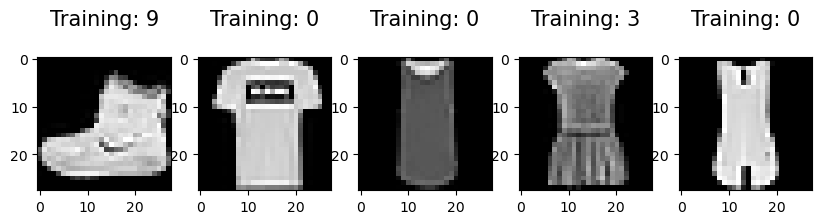

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
for idx in range(5):
    if sklearn.__version__ < '0.24.2':
        image = digits.data[idx,:]
    else:
            image = digits.data.iloc[idx,:]


    label  = digits.target[idx]
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % int(label), fontsize = 15)

5.ii
Show the corresponding matrix

In [ ]:
digits.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
if sklearn.__version__ < '0.24.2':
    print(np.array(digits.data[9,:]).reshape(28, 28))
else:
    print(np.array(digits.data.iloc[9,:]).reshape(28, 28))


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0
    0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0
    5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2
    0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134
  138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241
  177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   

5.iii Describe and Understand the Data( Same as Answer number 2,please refer)

Explain any special adaptation and characteristics:
The Fashion-MNIST dataset is structured to provide a straightforward yet challenging image classification problem. Each row represents a single image, and the columns provide the label and pixel values. The dataset’s balanced classes and rich pixel information make it well-suited for various machine learning, especially those designed to capture spatial patterns and handle noisy data.



6.
Build a Logistic Regression model


In [ ]:
#Load packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# ## Step 1: Select target variable

In [ ]:
y = digits.target

In [ ]:
y[0]

'9'

In [ ]:
# ## Step 2: Prepare data
# Reshape adapts the matrix form. This method could, for instance, turn a 10x10 matrix into 100 vectors

In [ ]:
n_samples = len(digits.data)
n_samples


70000

In [ ]:
X = digits.data
X.shape

(70000, 784)

In [ ]:
# ## Step 3: split into test set and training set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8 ,random_state=0)


In [ ]:
# ## Step 4: Select a Linear Regression classifier

In [ ]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 100)

In [ ]:
# ## Step 5: Fit the data

In [ ]:
lr.fit(X_train, y_train)

C:\Users\cpeng\anaconda3\envs\PRML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# ## Step 6: Predict on unseen data

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array(['9', '5', '6', ..., '6', '1', '8'], dtype=object)

7.
Analysis of results – classification report

In [ ]:
score = lr.score(X_test, y_test)
print(score)


0.8505714285714285


The output 0.8505714285714285 is the accuracy score of our logistic regression model on the test data. This means that our model correctly classified approximately 85.06% of the instances in the test dataset.

In [ ]:
# ## Step 7: Create confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1161,    8,   27,   76,    6,    1,   97,    2,   12,    1],
       [   5, 1361,    9,   35,   10,    0,    2,    0,    2,    0],
       [  17,    5, 1030,   14,  197,    2,   90,    0,   11,    0],
       [  53,   21,   14, 1251,   73,    1,   34,    2,    6,    0],
       [   1,    0,  107,   38, 1148,    0,   89,    0,    5,    0],
       [   2,    1,    0,    0,    0, 1274,    0,   63,   14,   43],
       [ 220,    5,  168,   44,  173,    0,  839,    1,   23,    0],
       [   0,    0,    0,    0,    0,   50,    0, 1240,    4,   60],
       [   3,    0,   12,    7,    3,   11,   16,   13, 1276,    0],
       [   1,    0,    0,    0,    0,   20,    0,   56,    6, 1328]],
      dtype=int64)

This confusion matrix shows the performance of a classification model. The diagonal elements represent correct predictions, while off-diagonal elements indicate misclassifications. The model performs well for classes with high diagonal values, such as class 9 (1328 correct predictions). However, there are significant misclassifications, particularly in class 6, where 220 instances were incorrectly classified as class 0. This suggests the model struggles with certain classes, especially class 6, indicating room for improvement in classification accuracy.

Visualize the predict
Display corrected prediction

In [ ]:
mages_and_predictions = list(zip(digits.data, lr.predict(X)))

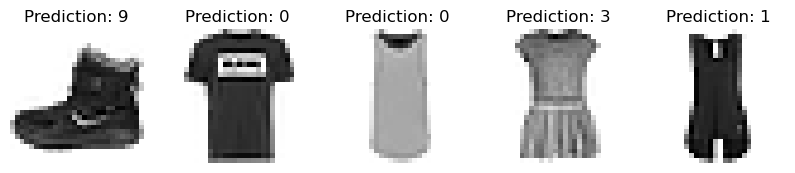

In [ ]:
plt.figure(figsize=(10,2))
for idx in range(5):
    if sklearn.__version__ < '0.24.2':
        image = digits.data[idx,:]
    else:
        image = digits.data.iloc[idx,:]

    prediction = lr.predict(X)[idx]
    plt.subplot(1,5,idx+1)
    plt.axis("off")
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % int(prediction))
plt.show()

The output displays a 1x5 grid of images from the dataset, each showing a handwritten digit. Each image is accompanied by its predicted digit label from our logistic regression model. This visualization shows the predicted model is well fitted with the actual digits and the predicted labels are accurate as it indicates that the model is performing well on these samples.

Display Misclassified images with Predicted Labels

In [ ]:

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

In [ ]:
misclassifiedIndexes[:5]

[4, 14, 16, 34, 40]

In [ ]:
y_pred[4]

'6'

In [ ]:
np.array(y_test)[:5]

array(['9', '5', '6', '6', '2'], dtype=object)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

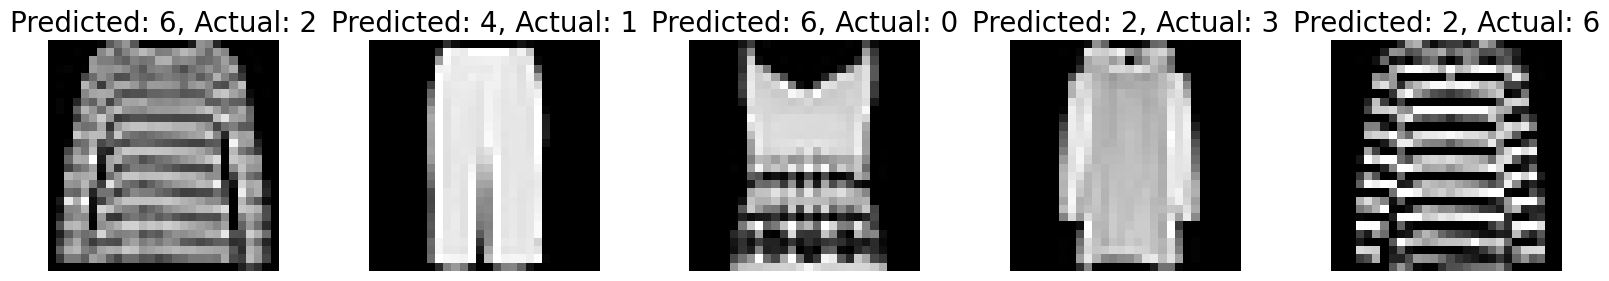

In [ ]:
plt.figure(figsize=(20,3))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.axis("off")
    if sklearn.__version__ < '0.24.2':
        image = X_test[badIndex, :]
    else:
        image = X_test.iloc[badIndex, :]
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], np.array(y_test)[badIndex]), fontsize = 20)

8.
Concept of Regularization in Logistic Regression:

Regularization is a technique used in Logistic Regression to prevent overfitting by adding a penalty to the model's complexity.Regularization discourages the model from fitting the training data too closely by penalizing large coefficients, which can lead to overfitting. Overfitting occurs when the model captures noise or random fluctuations in the training data, making it less effective on new, unseen data.

There are two main types of regularization used in Logistic Regression
1. L2 Regularization (Ridge Regression) : L2 regularization adds a penalty equal to the square of the magnitude of the coefficients (weights.: L2 regularization helps in reducing the impact of less important features (i.e., pixel values in the Fashion-MNIST dataset) without completely eliminating them, making the model simpler and less prone to overfitting.
 2. L1 Regularization (Lasso Regression) L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficientsEffect: L1 regularization helps in creating sparse models by zeroing out coefficients of less important features, which is useful when dealing with high-dimensional data like Fashion-MNIST.

How Regularization Prevents Overfitting:
Penalizing Large Coefficients: Regularization discourages the model from assigning large weights to any particular feature. In the absence of regularization, the model may assign high weights to some features, which might represent noise or outliers in the training data, leading to overfitting.
Simplifying the Model: Regularization encourages the model to be simpler and less complex by reducing the magnitude of the coefficients. A simpler model is less likely to capture noise and more likely to generalize well to unseen data.
Controlling Model Complexity: The regularization parameter λ acts as a control knob for model complexity. A higher λ value increases the penalty on the coefficients, reducing the risk of overfitting but potentially underfitting if set too high.

Using Regularization in Fashion-MNIST Modellin:g
In Fashion-MNIST, which is a high-dimensional dataset with 784 features (pixels), regularization plays a crucial role:
Managing High Dimensionality: With 784 features, there is a risk that some features (pixels) may be irrelevant or contribute minimally to the classification task. Regularization, particularly L1, can help in feature selection by shrinking the coefficients of irrelevant pixels to zero, thereby reducing the model's complexity.
Improving Generalization: Regularization helps ensure that the model generalizes well to new, unseen images, rather than overfitting to the specific patterns of the training set. This is important in Fashion-MNIST, where the model must correctly classify a wide variety of clothing images in different poses and lighting conditions.
Avoiding Overfitting in Complex Models: As the dataset contains many pixels, Logistic Regression without regularization might overfit by assigning high importance to certain pixels that represent noise. Regularization helps mitigate this by constraining the model, making it more robust.
Optimizing Model Performance: By tuning the regularization parameter λ through techniques like cross-validation, the model can achieve a balance between bias and variance, optimizing its performance on both the training and validation sets.


9.
Saving the Trained Model

In [ ]:
#The trained model can be saved using libraries like joblib or pickle.
import joblib

joblib.dump(lr, 'fashion_mnist_lr_model.pkl')


['fashion_mnist_lr_model.pkl']

Using the Trained Model for New Unseen Data

In [ ]:
import numpy as np
from PIL import Image

# Load the pre-trained model
model = joblib.load('fashion_mnist_model.pkl')

# Load and preprocess new image (as it's in grayscale and needs to be resized)
 # Convert to grayscale
new_image = Image.open('new_clothing_image.png').convert('L')
# Resize to 28x28 pixels
new_image_resized = new_image.resize((28, 28))
# Flatten the image
new_image_array = np.array(new_image_resized).reshape(1, -1)
# Normalize pixel values

new_image_normalized = new_image_array / 255.0
# Predict the class label for the new image
prediction = model.predict(new_image_normalized)
print(f"Predicted class label: {prediction[0]}")